In [134]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST

dataset = MNIST(root='~/data', download=False, transform=ToTensor())

In [136]:
from flexfl.data.sampler import FederatedSampler

fed_sampler = FederatedSampler(dataset=dataset, num_clients=5, sample_size_non_iidness='medium', target_non_iidness='low')
fed_sampler.total_samples

58853

In [137]:
[len(fed_sampler.clients[client_id]) for client_id in range(5)]

[4147, 25126, 11125, 1666, 16789]

In [138]:
from torch.utils.data import DataLoader

# Count class distribution per site in a dataframe
class_counting = {client_id: [0] * 10 for client_id in range(5)}
for client_id in range(5):
    loader = DataLoader(fed_sampler.clients[client_id], batch_size=1, shuffle=False)
    for _, y in loader:
        for y_i in y:
            class_counting[client_id][y_i] += 1
class_counting

{0: [403, 427, 421, 438, 422, 404, 394, 423, 415, 400],
 1: [2585, 2559, 2415, 2522, 2569, 2514, 2427, 2458, 2571, 2506],
 2: [1075, 1160, 1117, 1109, 1100, 1122, 1100, 1100, 1130, 1112],
 3: [158, 173, 164, 164, 162, 174, 166, 174, 165, 166],
 4: [1702, 1904, 1781, 1767, 1589, 1207, 1774, 1730, 1570, 1765]}

<Axes: >

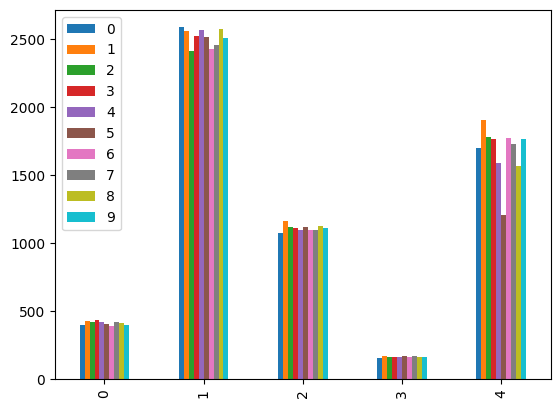

In [139]:
import pandas as pd

df = pd.DataFrame(class_counting).T
df.plot.bar()